In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('housing.csv')

# Step1: EDA

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.isnull().mean()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

# Step2: Handling Outliers

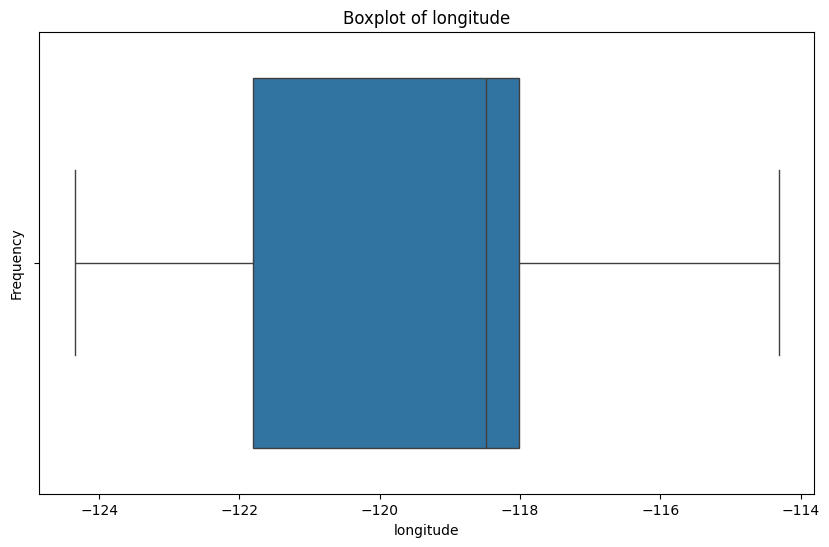

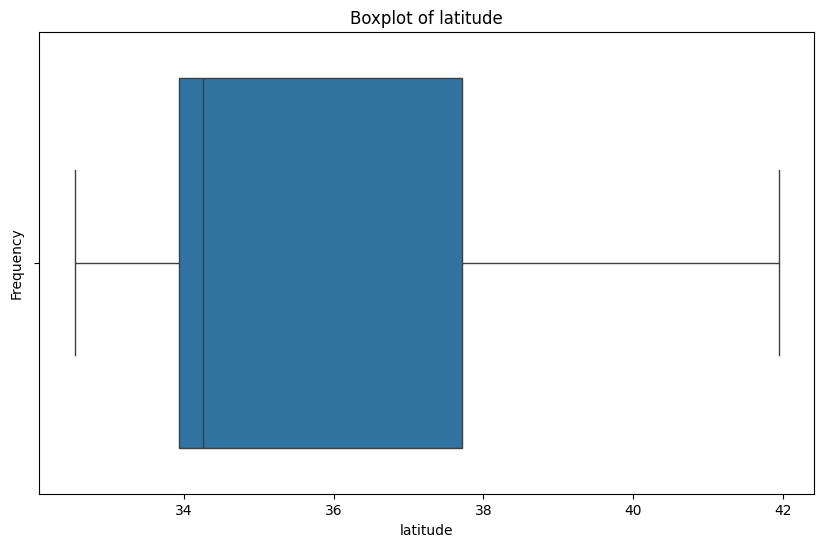

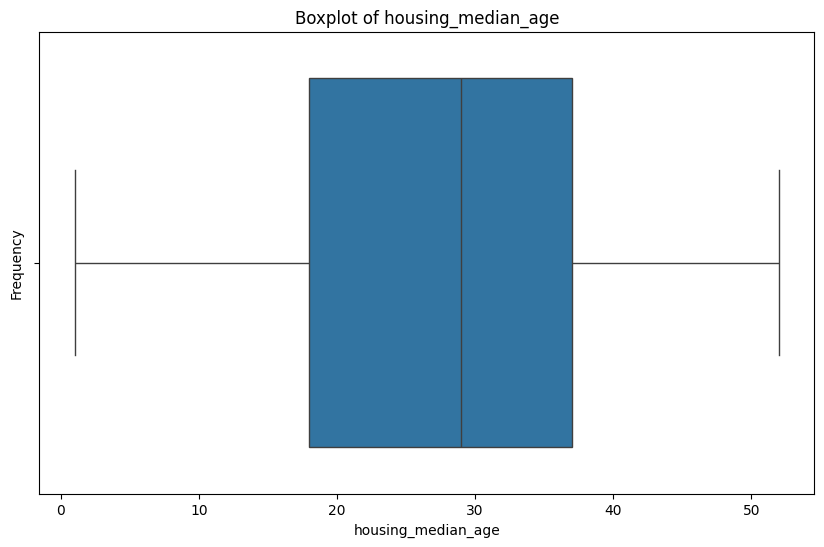

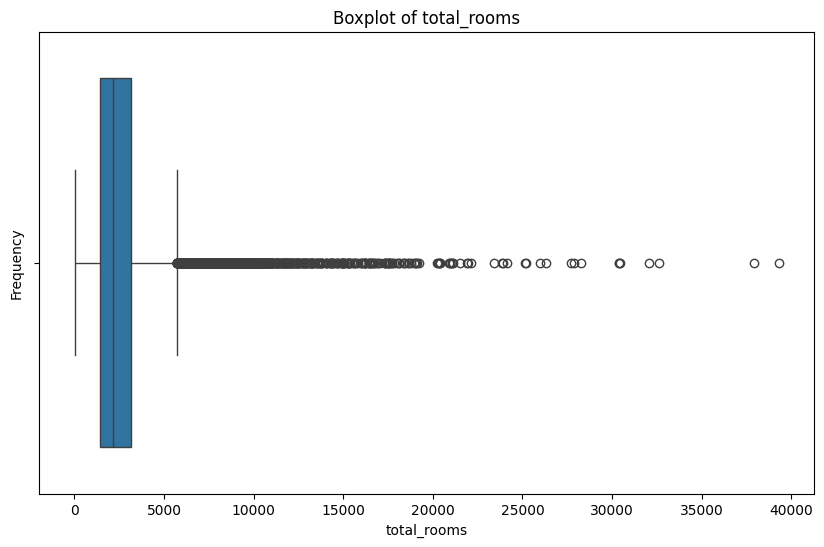

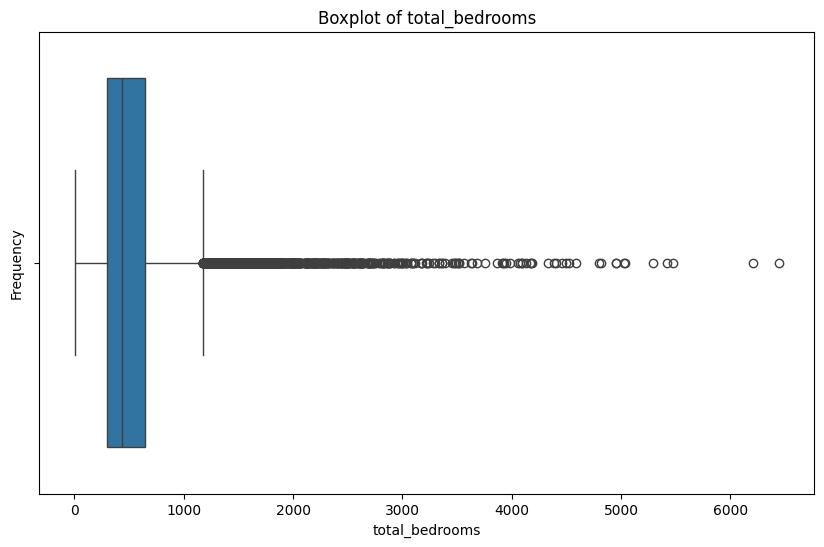

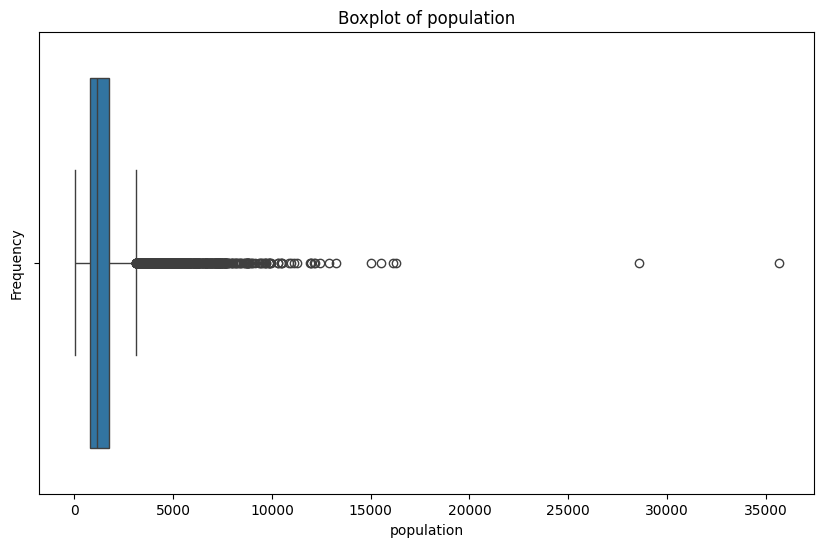

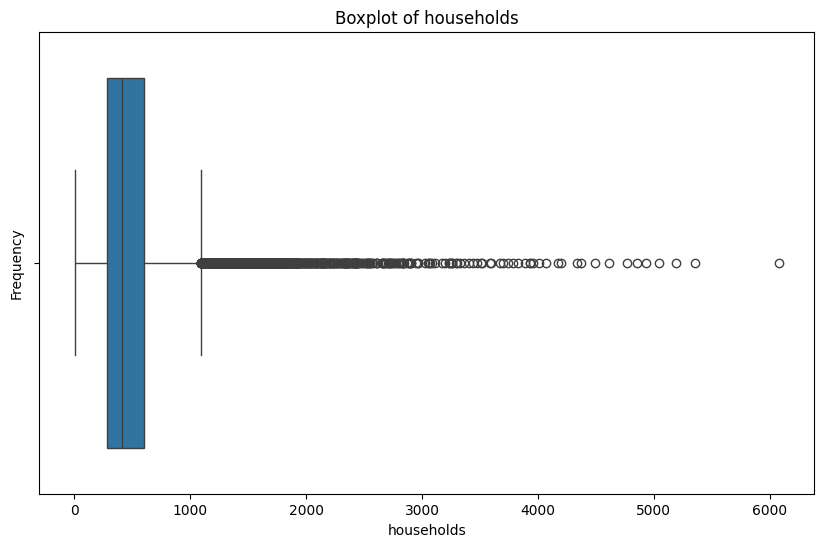

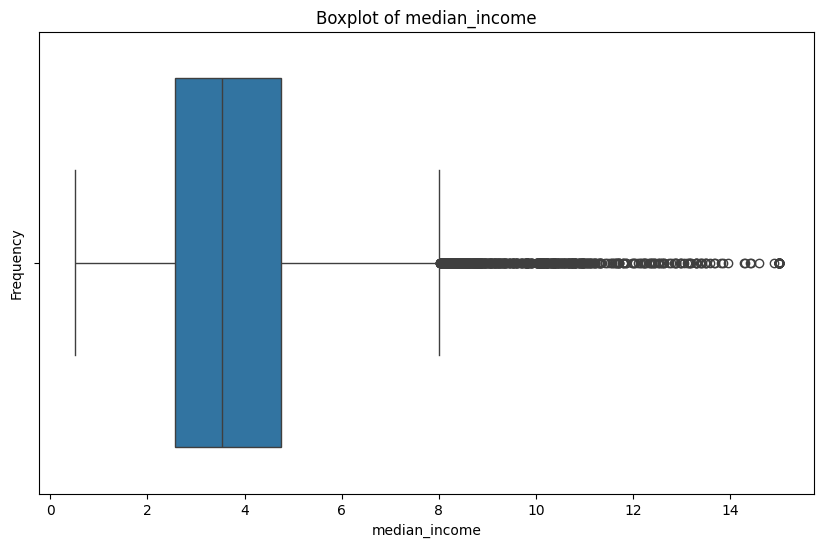

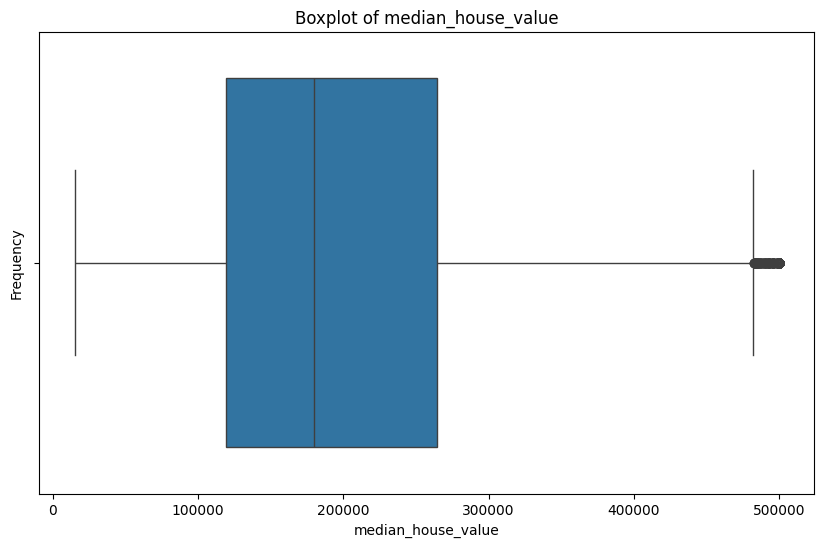

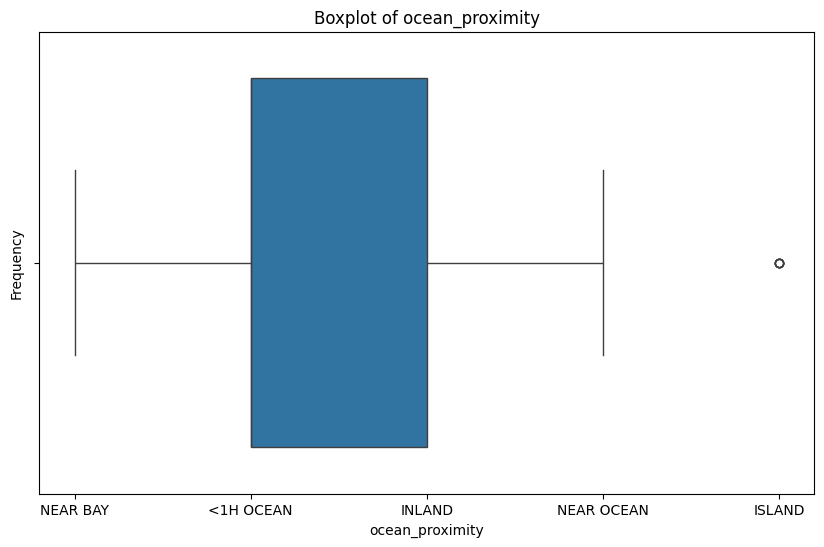

In [5]:
for feature in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[feature], orient='h')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [8]:
df['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [9]:
# For Total_Rooms
percentile25 = df['total_rooms'].quantile(0.25)
percentile75 = df['total_rooms'].quantile(0.75)

IQR = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

print('UpperLimit', upper_limit)
print('lowerLimit', lower_limit)

UpperLimit 5698.375
lowerLimit -1102.625


<Axes: xlabel='total_rooms'>

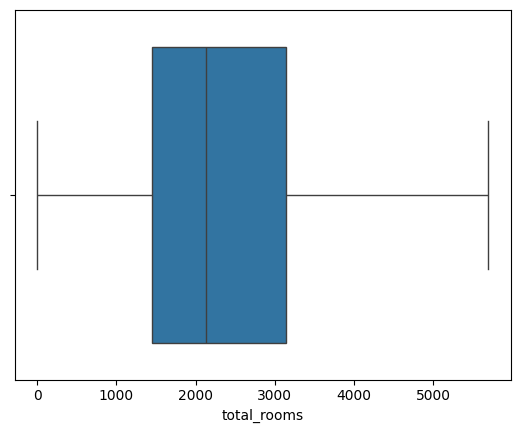

In [10]:
df['total_rooms'] = np.where(
    df['total_rooms'] > upper_limit,
    upper_limit,
    np.where(
        df['total_rooms'] < lower_limit, 
        lower_limit, 
        df['total_rooms']
    )
)

sns.boxplot(df['total_rooms'], orient='h')

In [11]:
# For total_bedrooms
df['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [12]:
percentile25 = df['total_bedrooms'].quantile(0.25)
percentile75 = df['total_bedrooms'].quantile(0.75)

IQR = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

print('UpperLimit', upper_limit)
print('lowerLimit', lower_limit)

UpperLimit 1173.5
lowerLimit -230.5


<Axes: xlabel='total_bedrooms'>

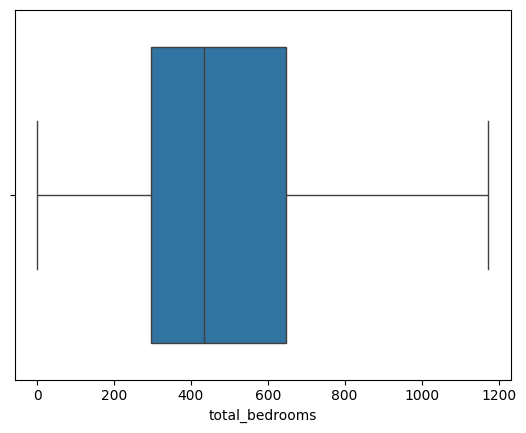

In [13]:
df['total_bedrooms'] = np.where(
    df['total_bedrooms'] > upper_limit,
    upper_limit,
    np.where(
        df['total_bedrooms'] < lower_limit, 
        lower_limit, 
        df['total_bedrooms']
    )
)

sns.boxplot(df['total_bedrooms'], orient='h')

In [14]:
# For populatoin
df['population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

In [15]:
percentile25 = df['population'].quantile(0.25)
percentile75 = df['population'].quantile(0.75)

IQR = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

print('UpperLimit', upper_limit)
print('lowerLimit', lower_limit)

UpperLimit 3132.0
lowerLimit -620.0


<Axes: xlabel='population'>

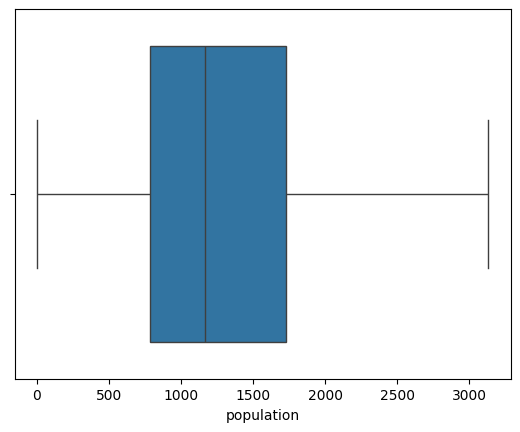

In [16]:
df['population'] = np.where(
    df['population'] > upper_limit,
    upper_limit,
    np.where(
        df['population'] < lower_limit, 
        lower_limit, 
        df['population']
    )
)

sns.boxplot(df['population'], orient='h')

In [17]:
# For HouseHolds
df['households'].describe()

count    20640.000000
mean       499.539680
std        382.329753
min          1.000000
25%        280.000000
50%        409.000000
75%        605.000000
max       6082.000000
Name: households, dtype: float64

In [18]:
percentile25 = df['households'].quantile(0.25)
percentile75 = df['households'].quantile(0.75)

IQR = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

print('UpperLimit', upper_limit)
print('lowerLimit', lower_limit)

UpperLimit 1092.5
lowerLimit -207.5


<Axes: xlabel='households'>

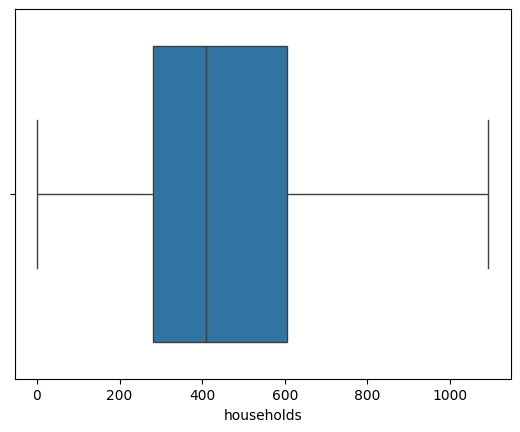

In [19]:
df['households'] = np.where(
    df['households'] > upper_limit,
    upper_limit,
    np.where(
        df['households'] < lower_limit, 
        lower_limit, 
        df['households']
    )
)

sns.boxplot(df['households'], orient='h')

In [20]:
# For median_income
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [21]:
percentile25 = df['median_house_value'].quantile(0.25)
percentile75 = df['median_house_value'].quantile(0.75)

IQR = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

print('UpperLimit', upper_limit)
print('lowerLimit', lower_limit)

UpperLimit 482412.5
lowerLimit -98087.5


<Axes: xlabel='median_house_value'>

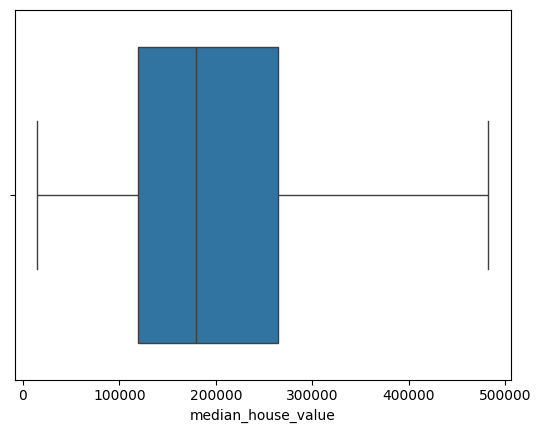

In [22]:
df['median_house_value'] = np.where(
    df['median_house_value'] > upper_limit,
    upper_limit,
    np.where(
        df['median_house_value'] < lower_limit, 
        lower_limit, 
        df['median_house_value']
    )
)

sns.boxplot(df['median_house_value'], orient='h')

In [23]:
df['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [24]:
percentile25 = df['median_income'].quantile(0.25)
percentile75 = df['median_income'].quantile(0.75)

IQR = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

print('UpperLimit', upper_limit)
print('lowerLimit', lower_limit)

UpperLimit 8.013024999999999
lowerLimit -0.7063750000000004


<Axes: xlabel='median_income'>

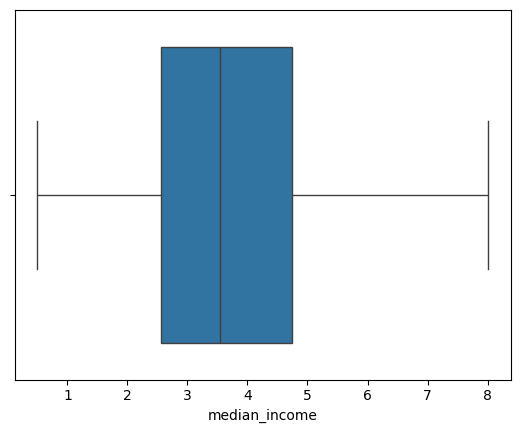

In [25]:
df['median_income'] = np.where(
    df['median_income'] > upper_limit,
    upper_limit,
    np.where(
        df['median_income'] < lower_limit, 
        lower_limit, 
        df['median_income']
    )
)

sns.boxplot(df['median_income'], orient='h')

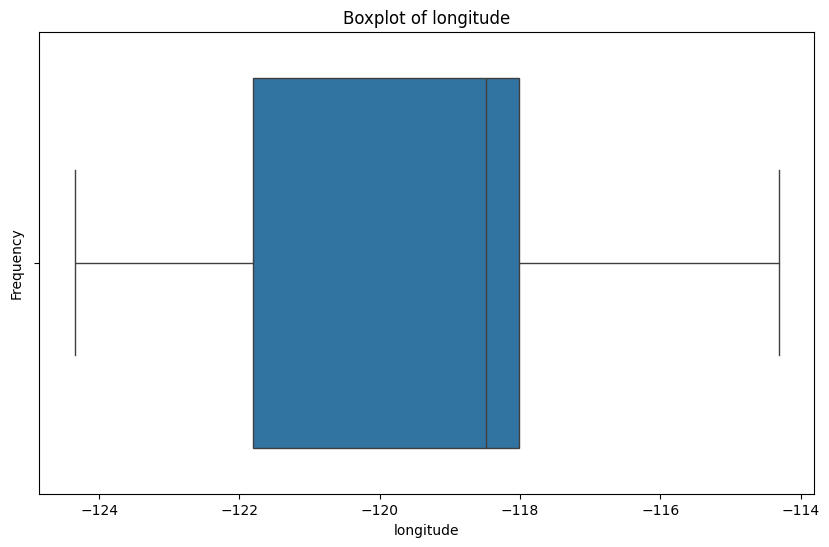

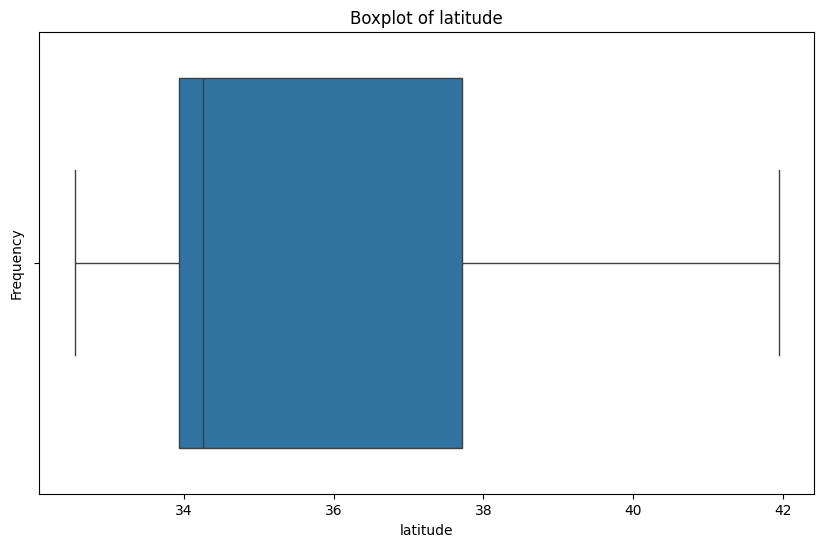

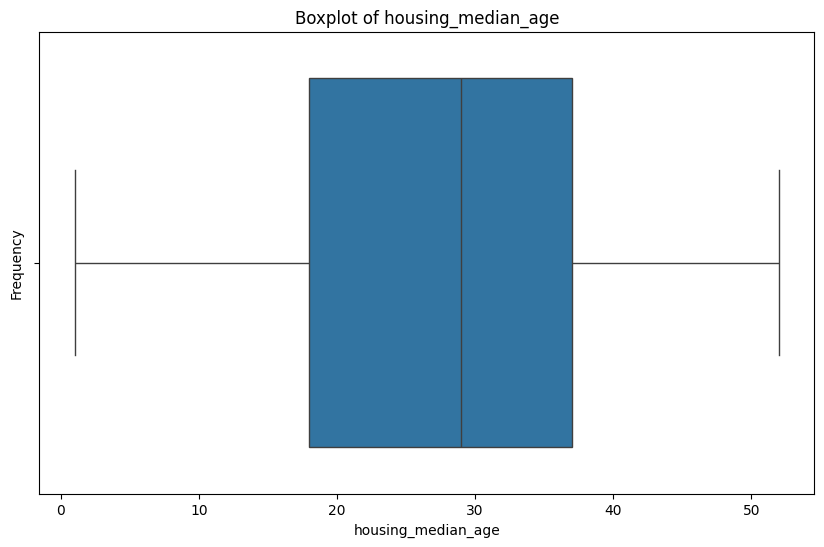

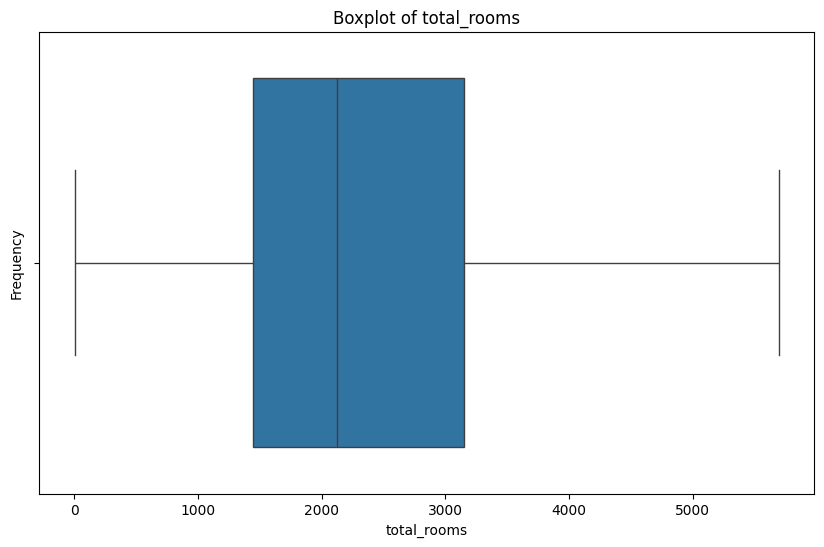

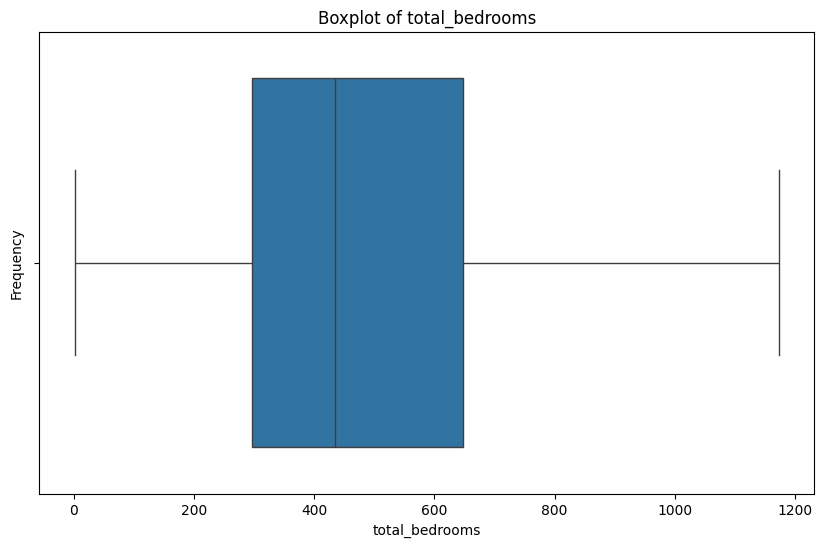

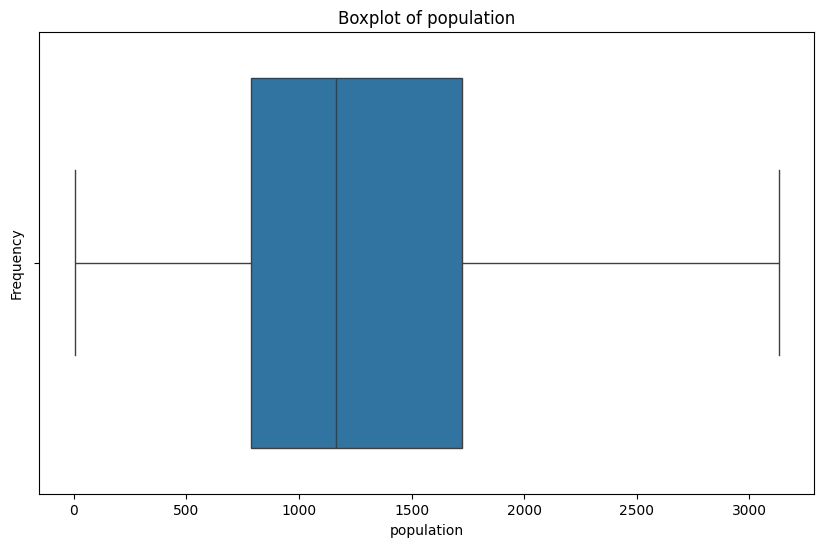

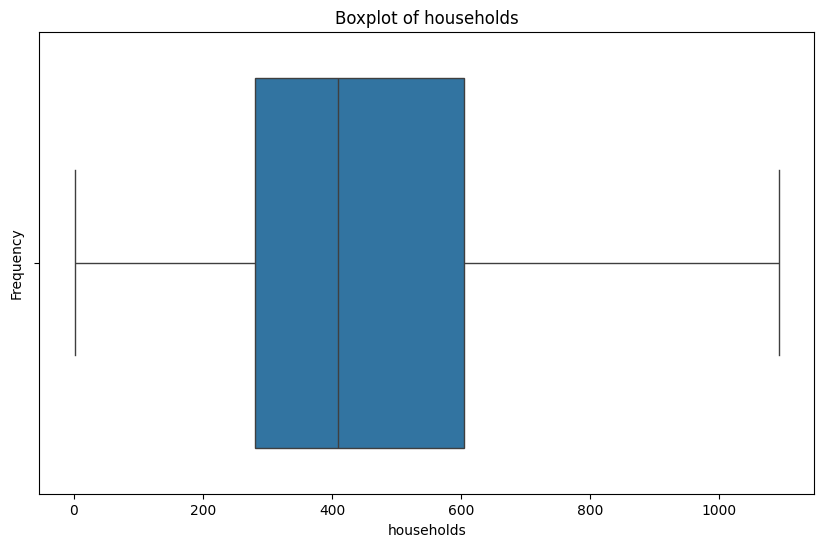

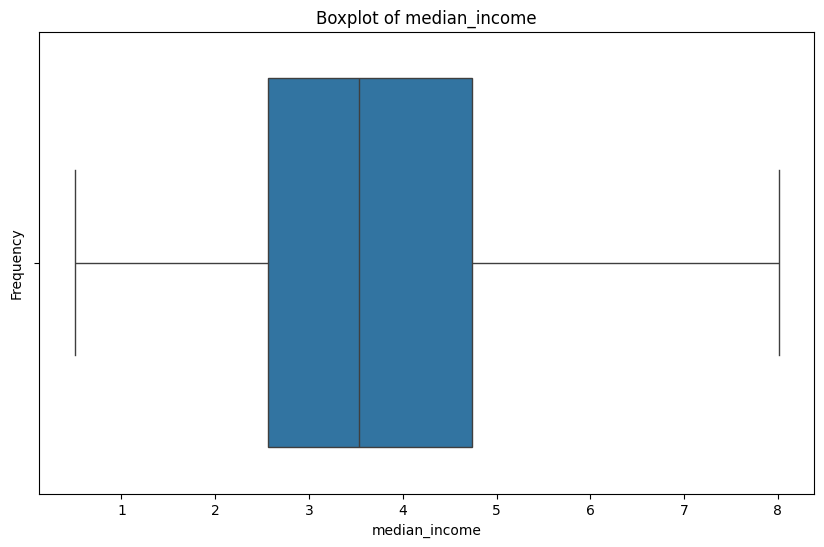

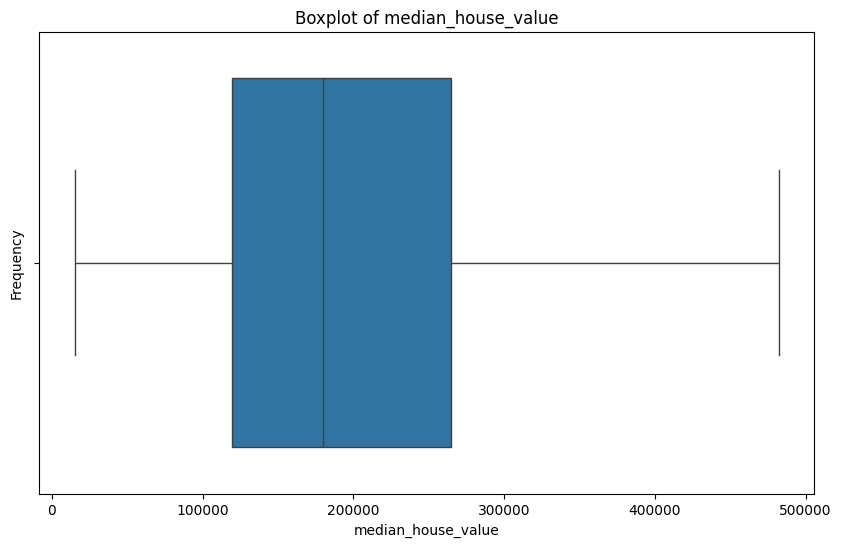

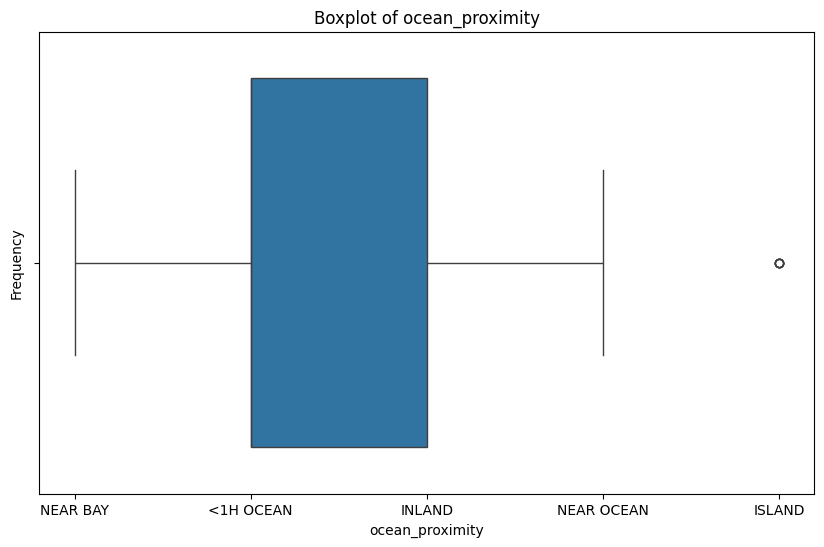

In [26]:
# Checking If the outliers remove or not
for feature in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[feature], orient='h')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Step3: Handling Imbalanced Data

In [27]:
# Missing Value Imputation
si = SimpleImputer(strategy='mean')

df['total_bedrooms'] = si.fit_transform(df[['total_bedrooms']])

In [28]:
df.isnull().mean()

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

In [29]:
# One Hot Encode The ocean_proximity
# ohe = OneHotEncoder(sparse_output=False)

df = pd.get_dummies(df)

In [30]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2444196841.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)


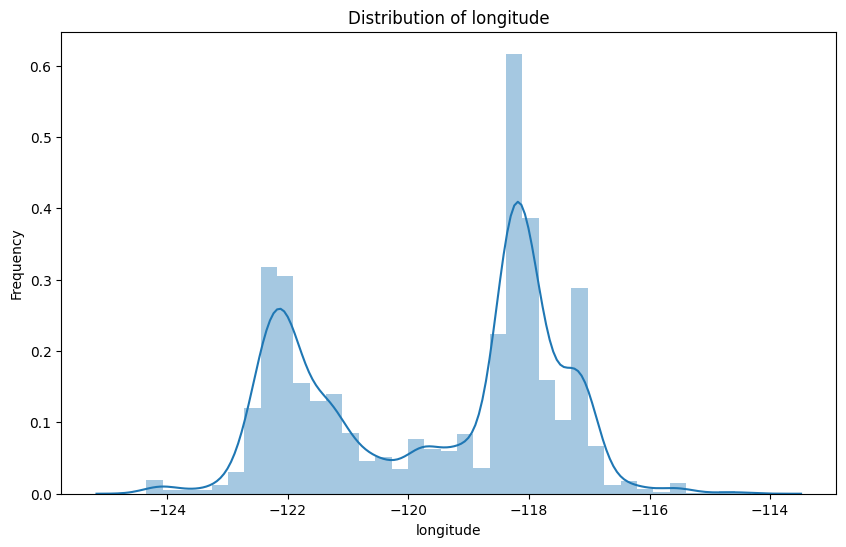

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2444196841.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)


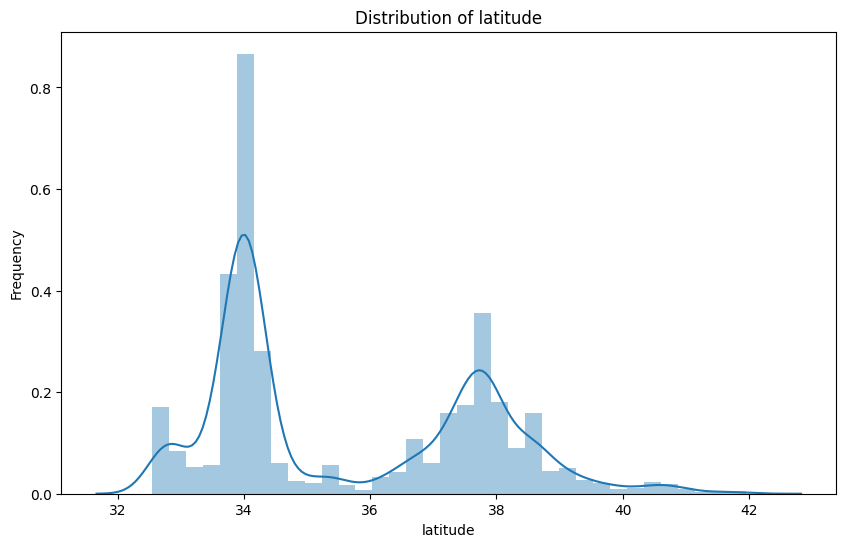

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2444196841.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)


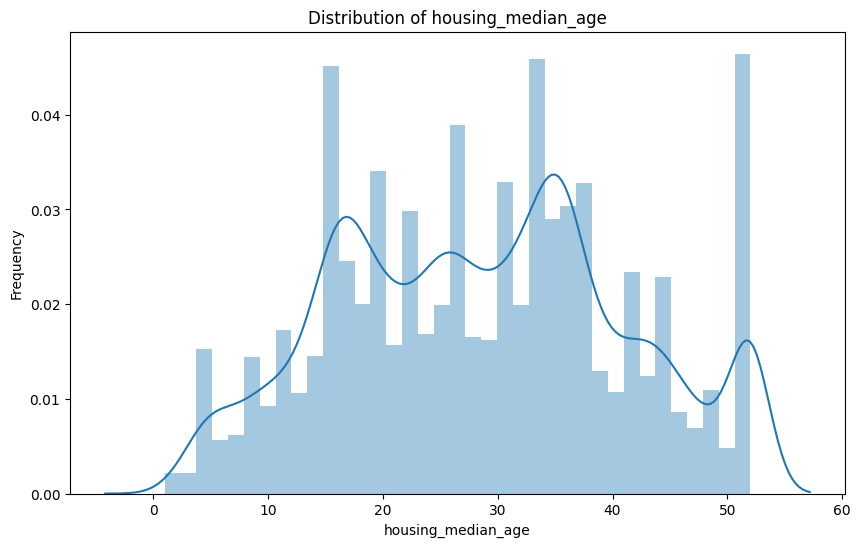

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2444196841.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)


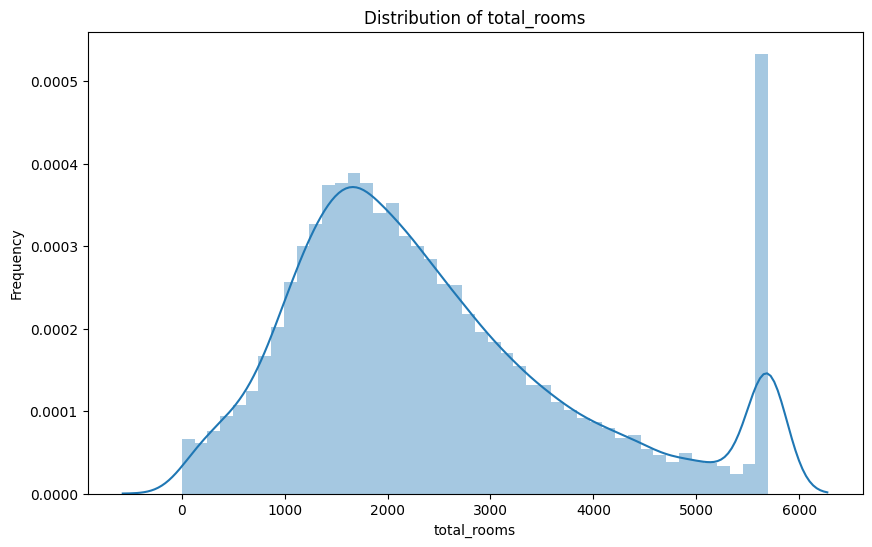

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2444196841.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)


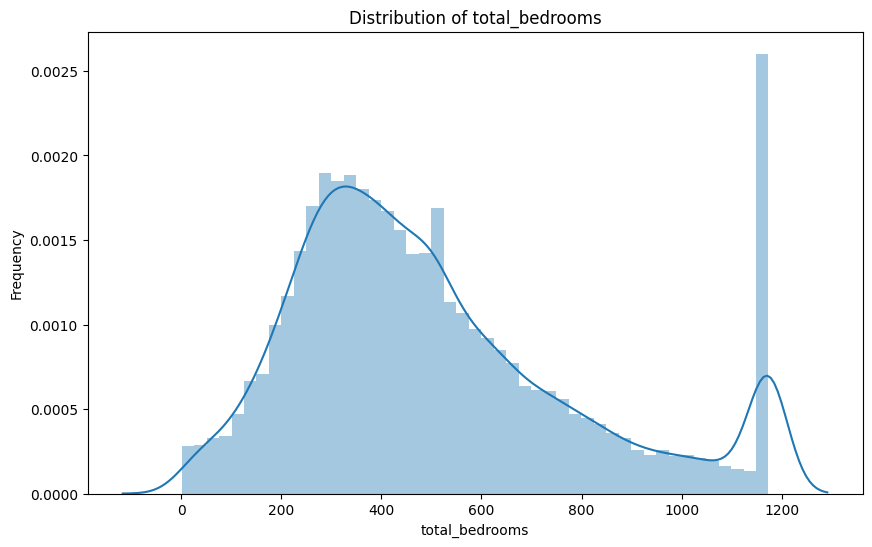

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2444196841.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)


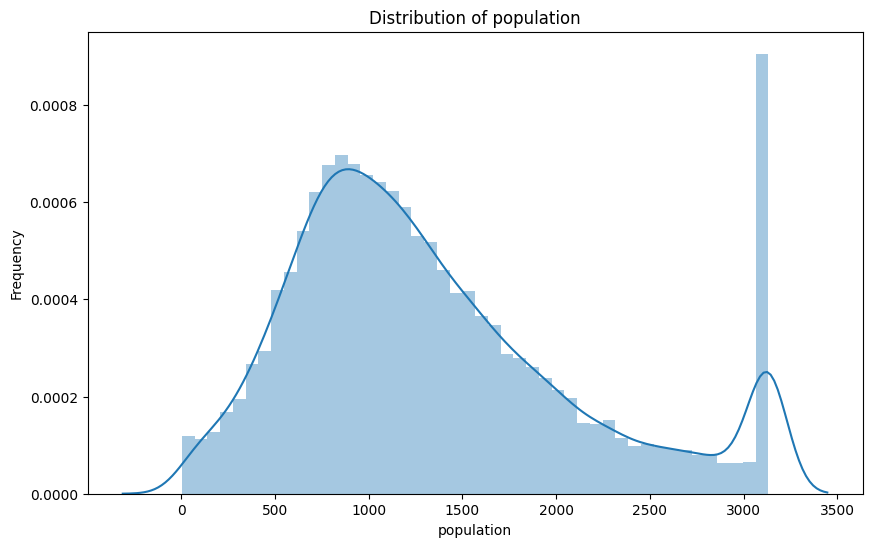

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2444196841.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)


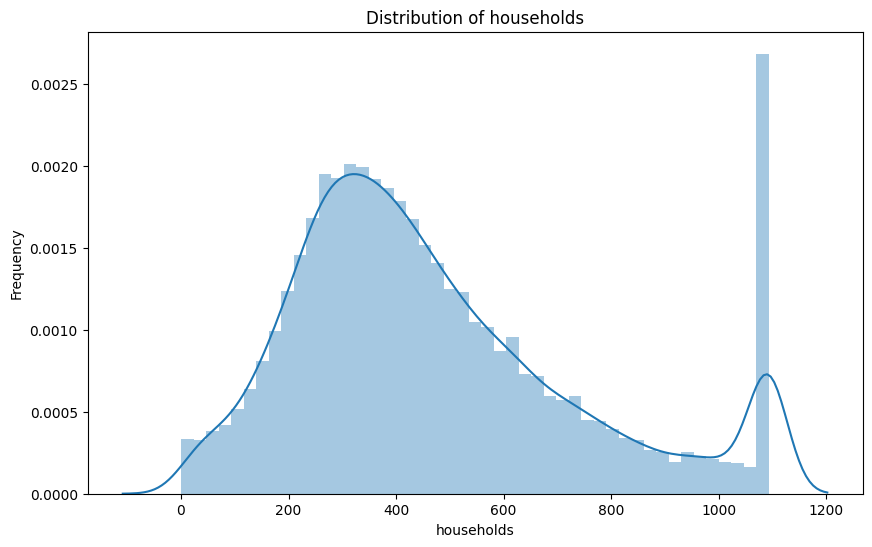

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2444196841.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)


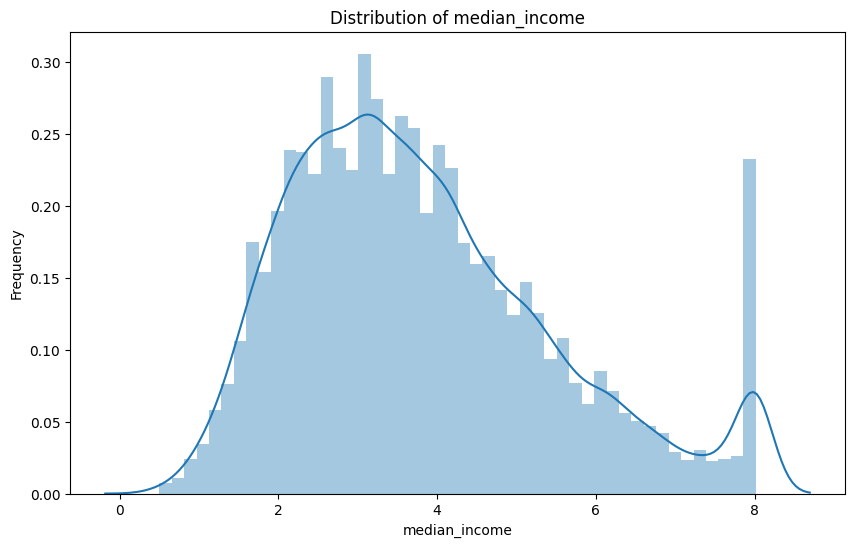

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2444196841.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)


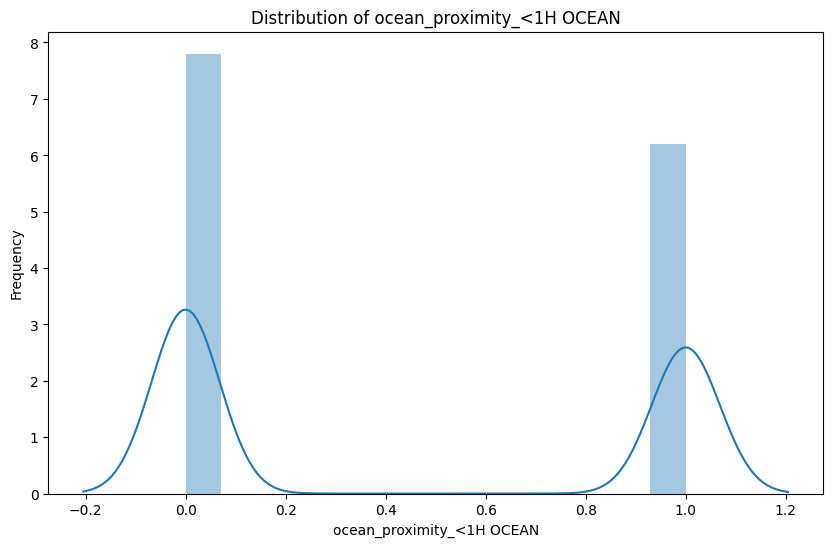

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2444196841.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)


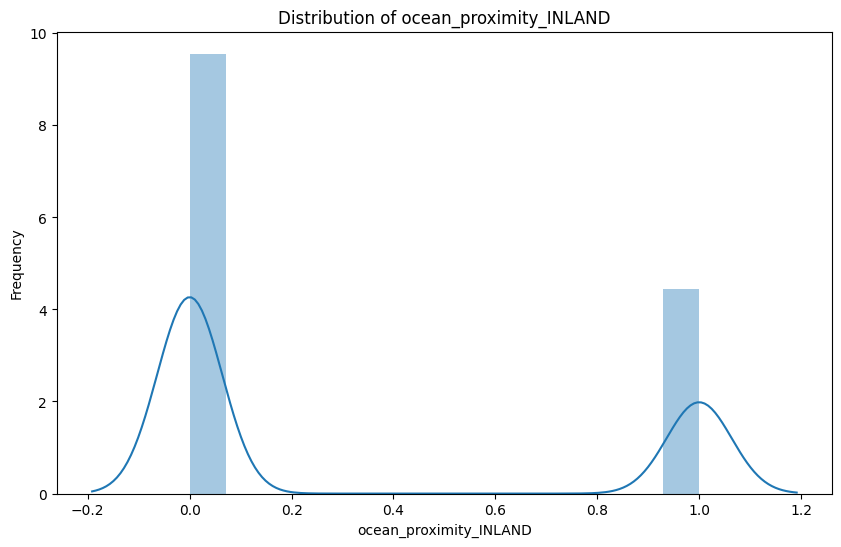

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2444196841.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)


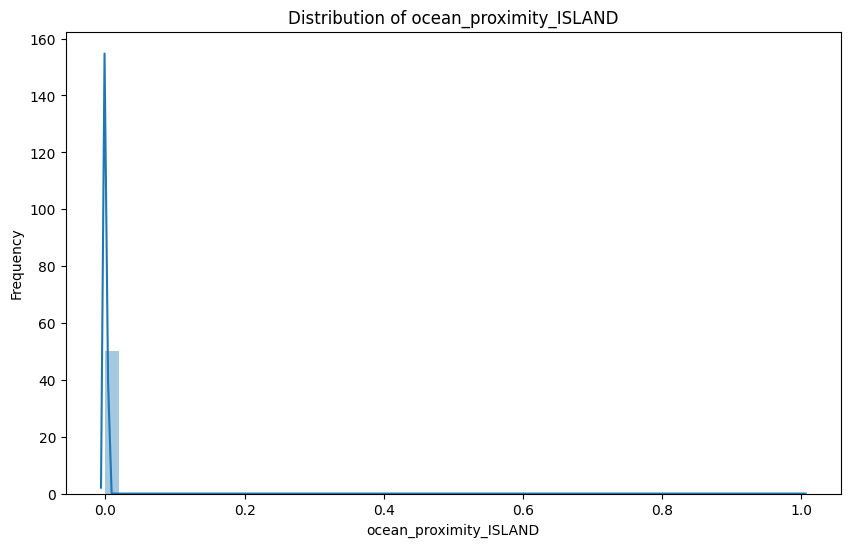

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2444196841.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)


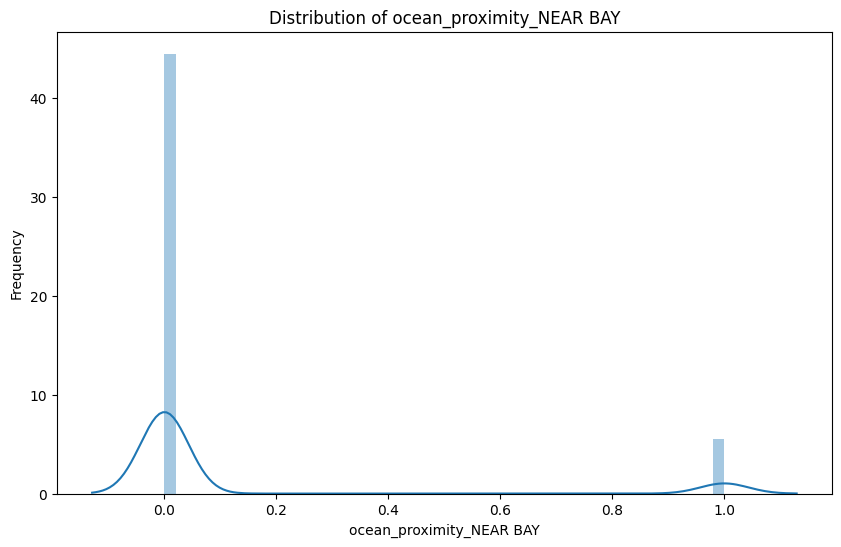

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2444196841.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)


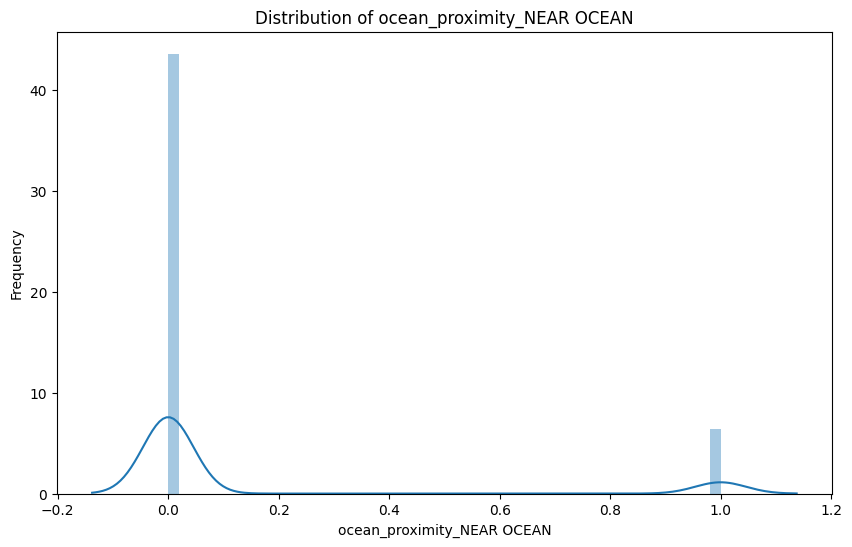

In [32]:
# Normally Distribute The Data
for feature in X_train.columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [33]:
pt = PowerTransformer(standardize=False)

X_train_trf = pt.fit_transform(X_train)
X_test_trf = pt.transform(X_test)

In [34]:
new_df = pd.DataFrame(X_train_trf, columns=X_train.columns)

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\4133423799.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['latitude'], kde=True)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\4133423799.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['latitude'], kde=True)


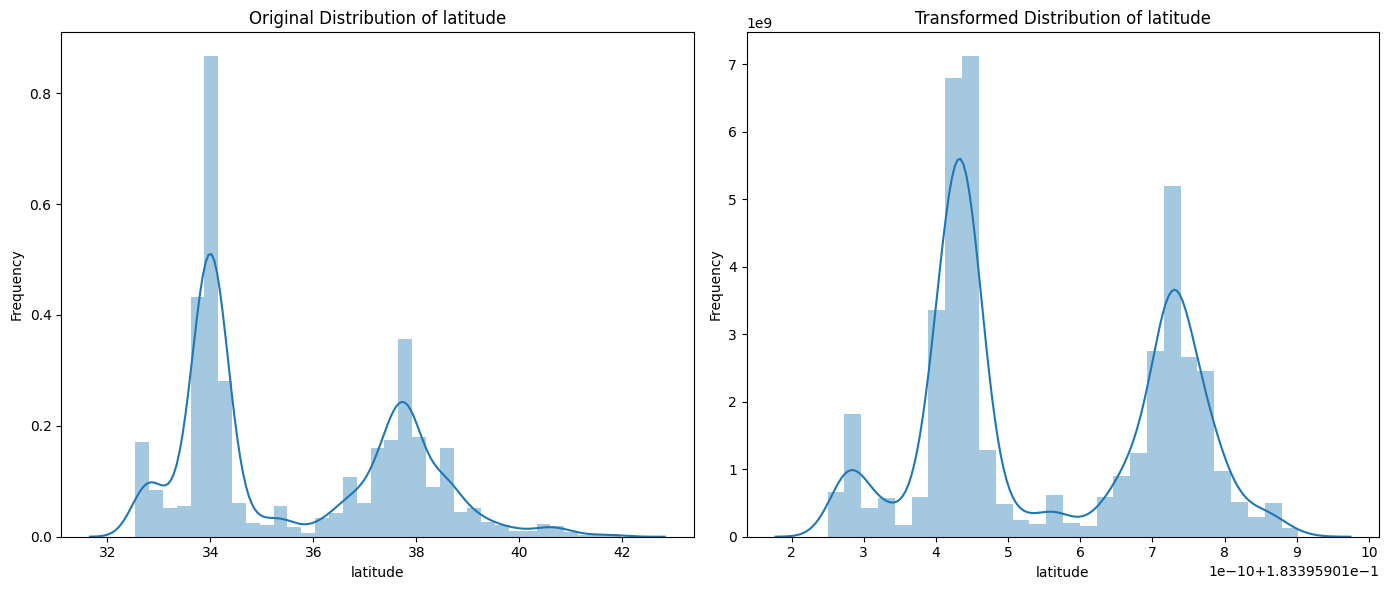

In [39]:
plt.figure(figsize=(14, 6))
    
# Original distribution
plt.subplot(1, 2, 1)
sns.distplot(df['latitude'], kde=True)
plt.title(f'Original Distribution of {'latitude'}')
plt.xlabel('latitude')
plt.ylabel('Frequency')
    
# Transformed distribution
plt.subplot(1, 2, 2)
sns.distplot(new_df['latitude'], kde=True)
plt.title(f'Transformed Distribution of {'latitude'}')
plt.xlabel('latitude')
plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[feature], kde=True)


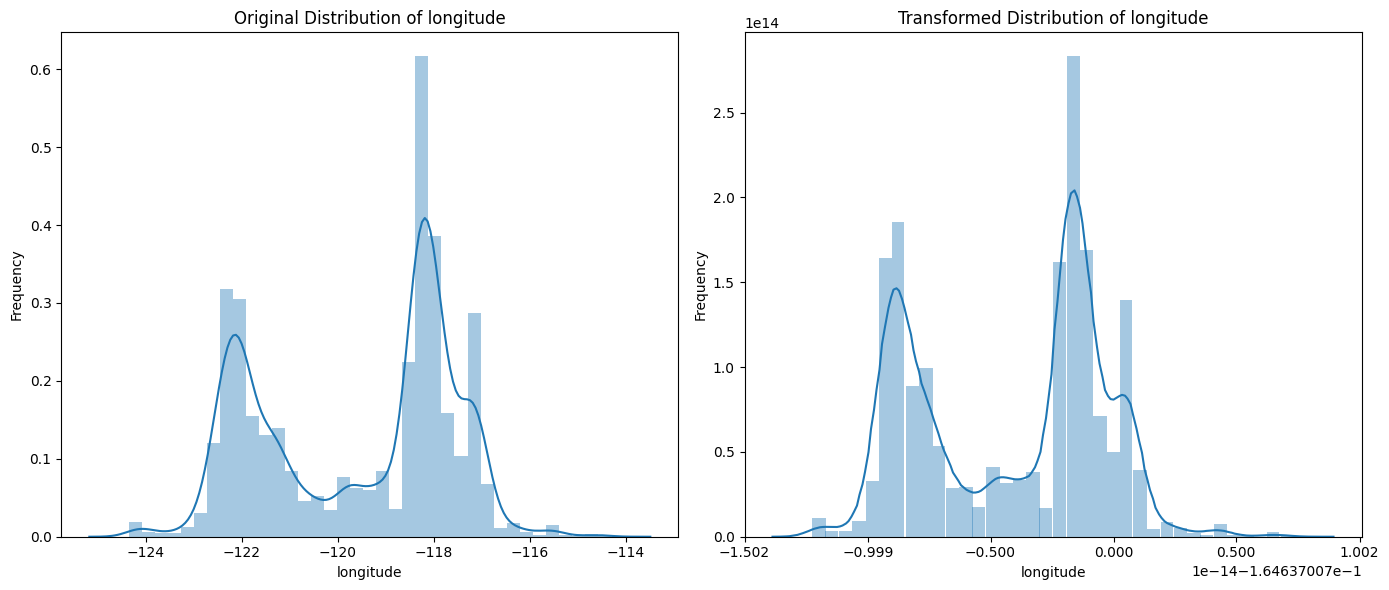

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[feature], kde=True)


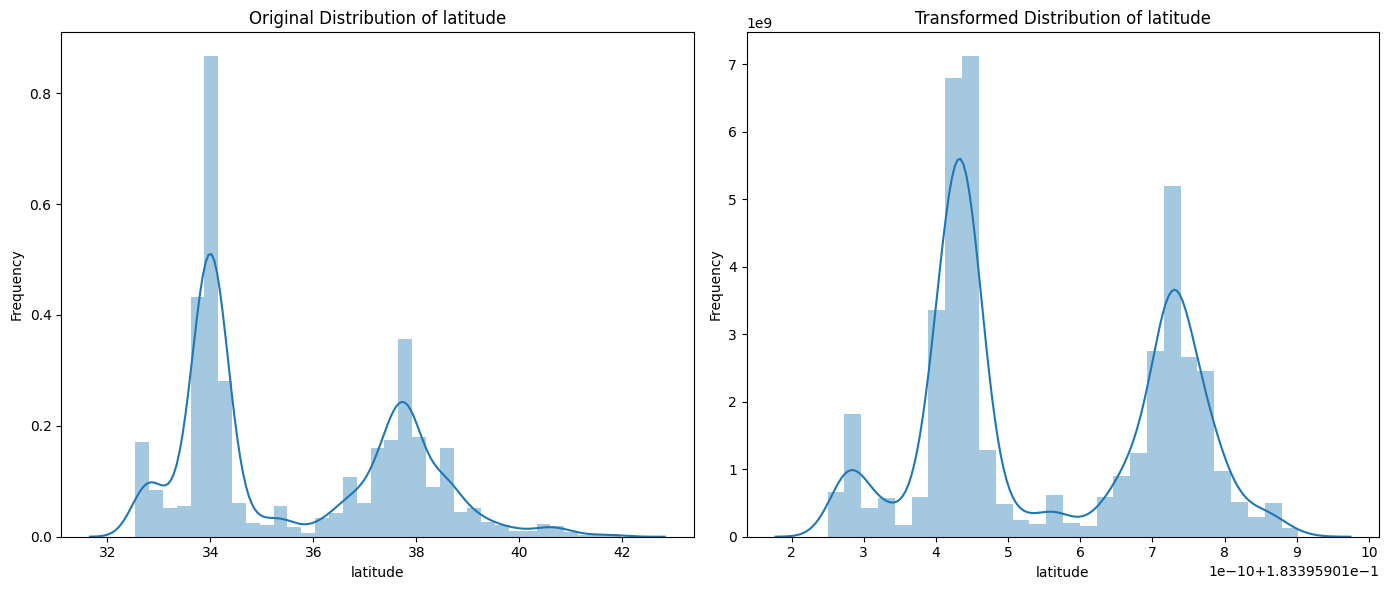

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[feature], kde=True)


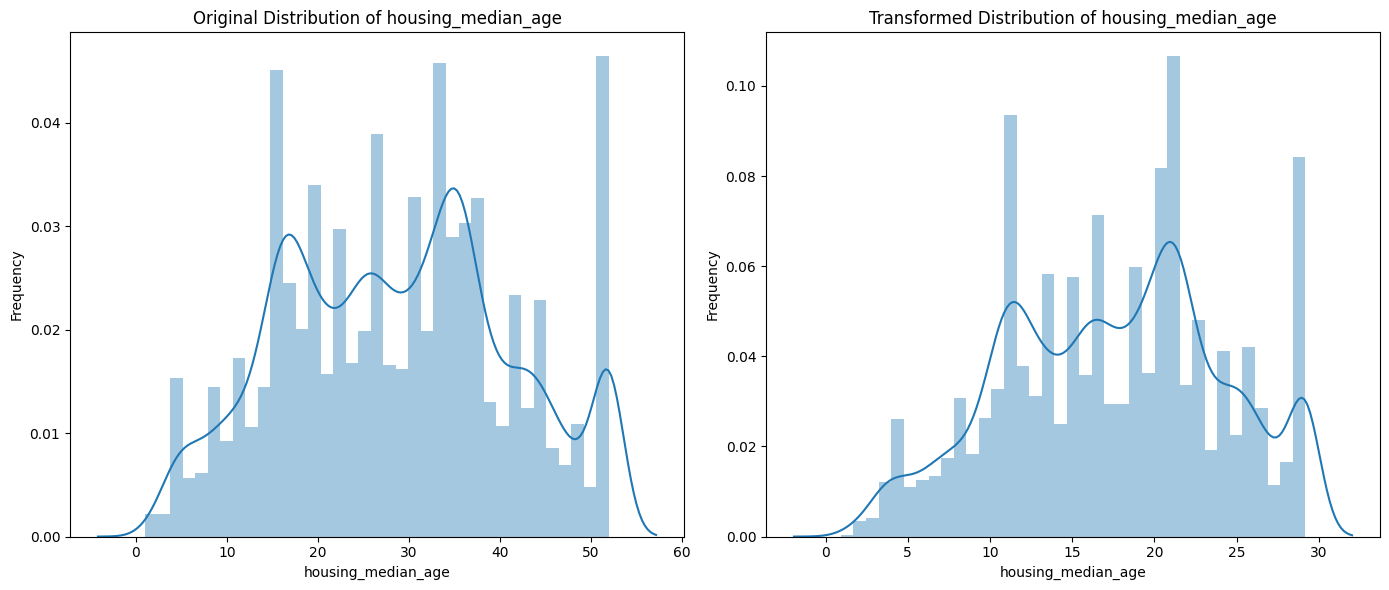

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[feature], kde=True)


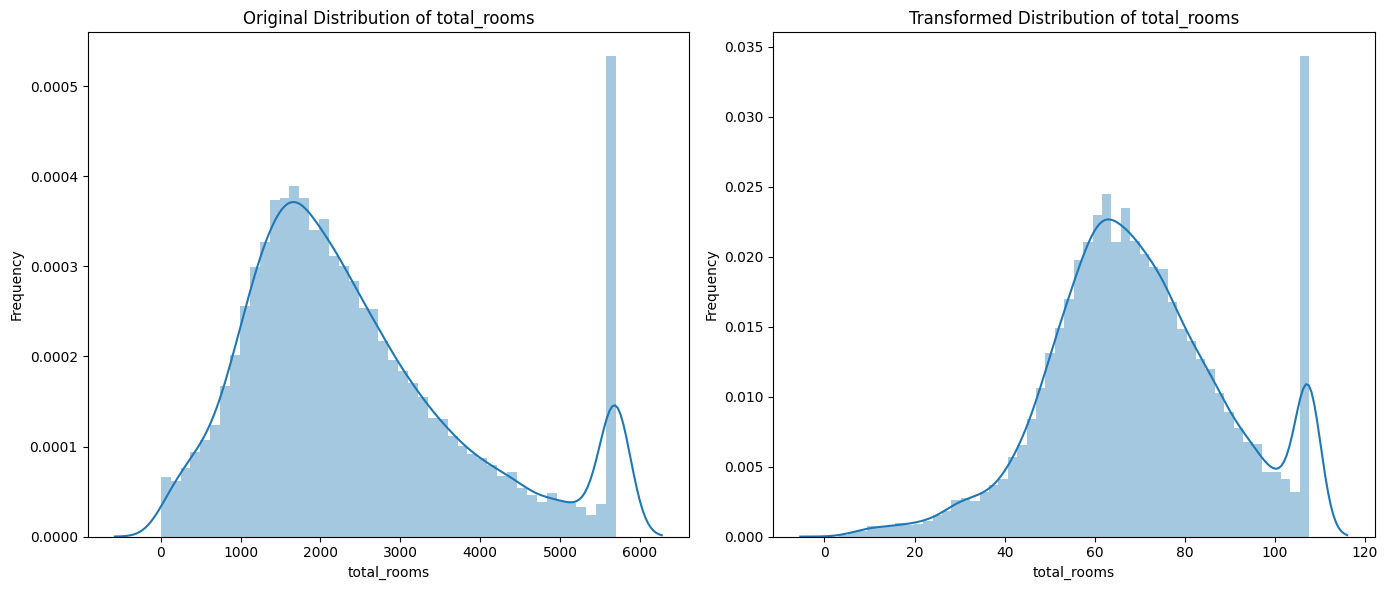

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[feature], kde=True)


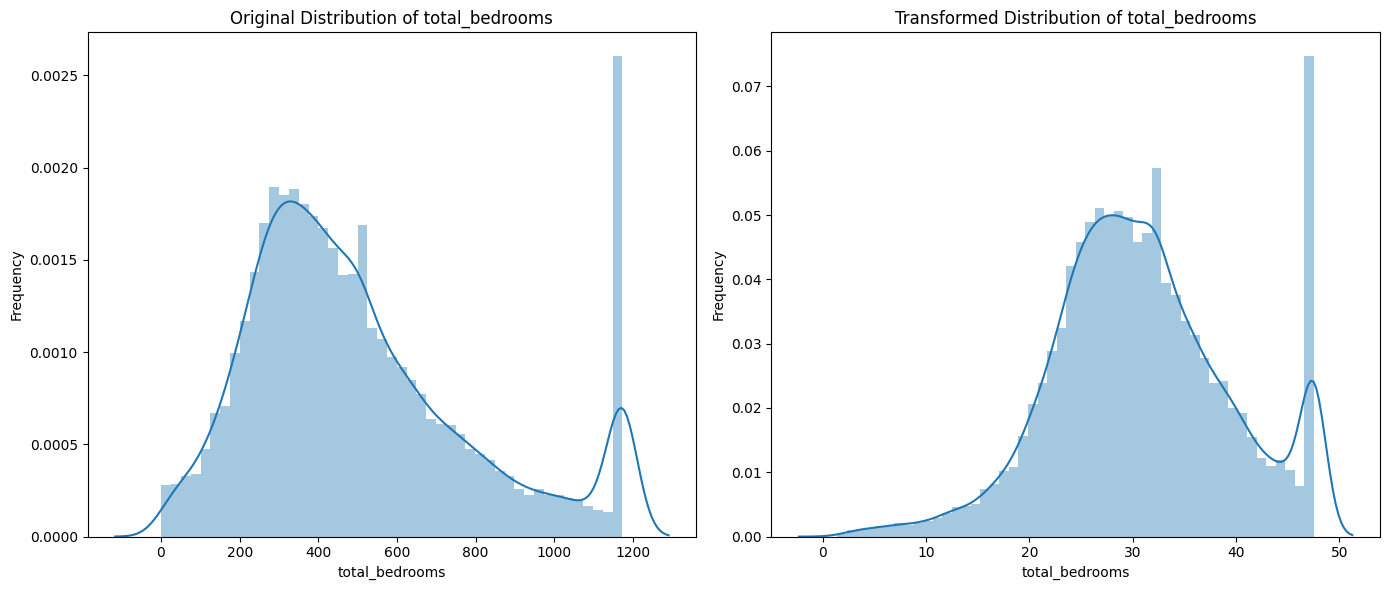

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[feature], kde=True)


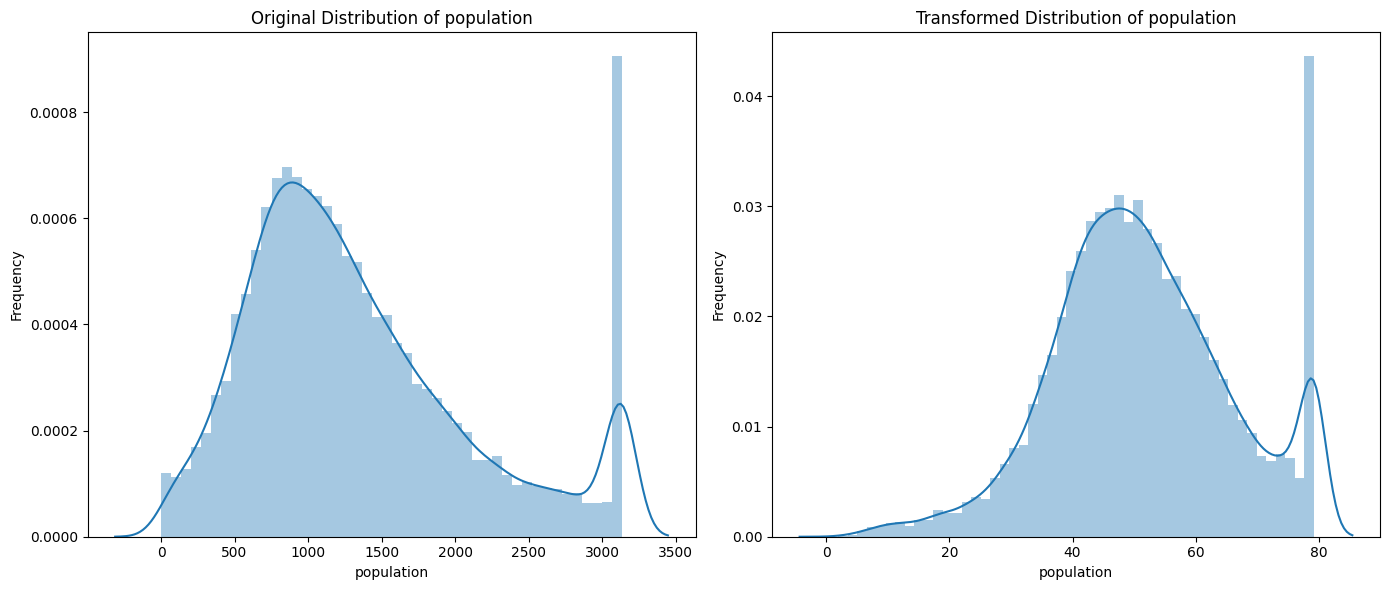

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[feature], kde=True)


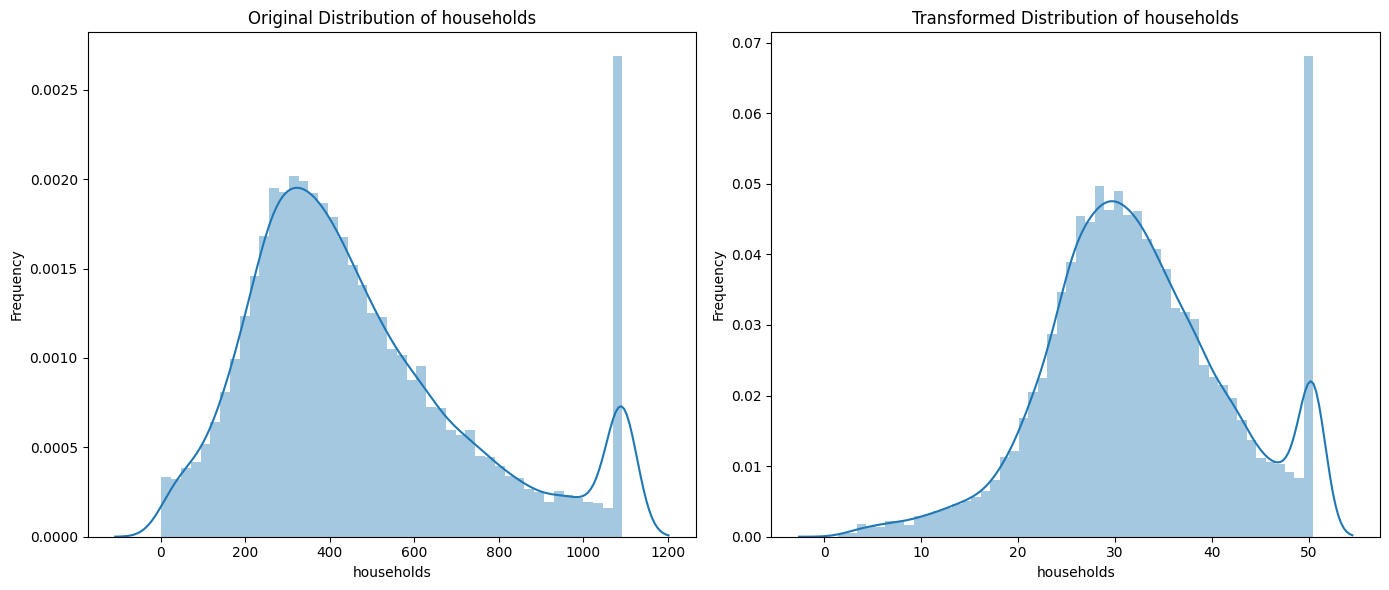

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[feature], kde=True)


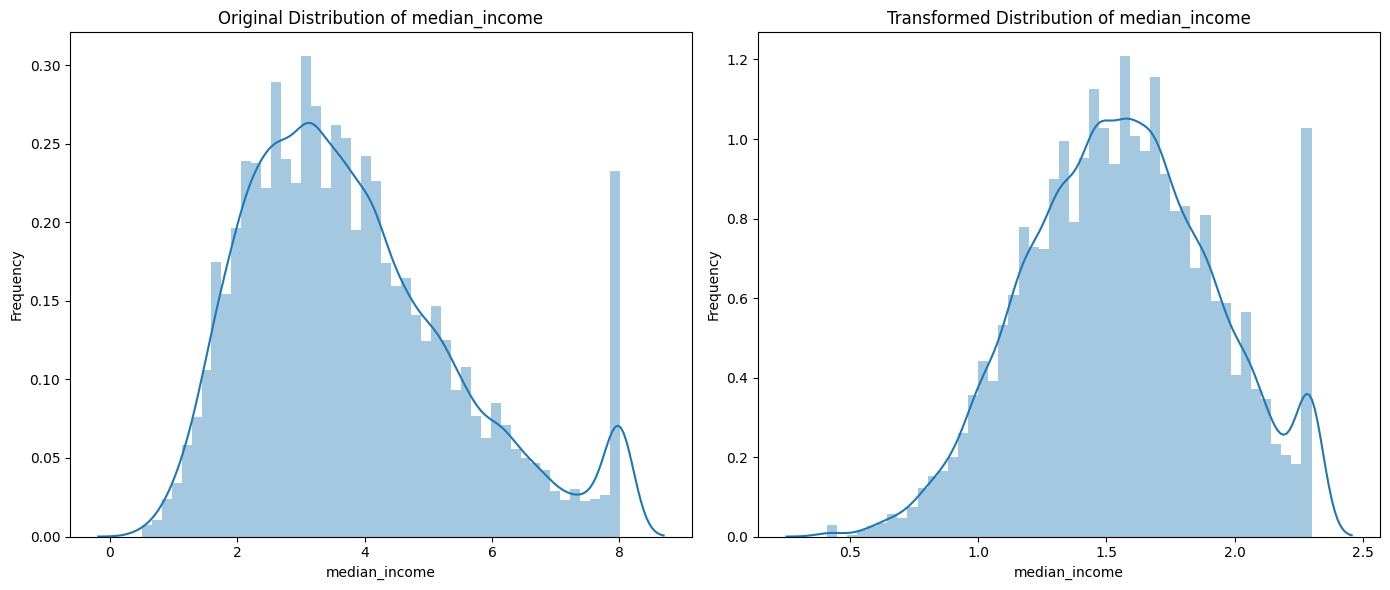

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[feature], kde=True)


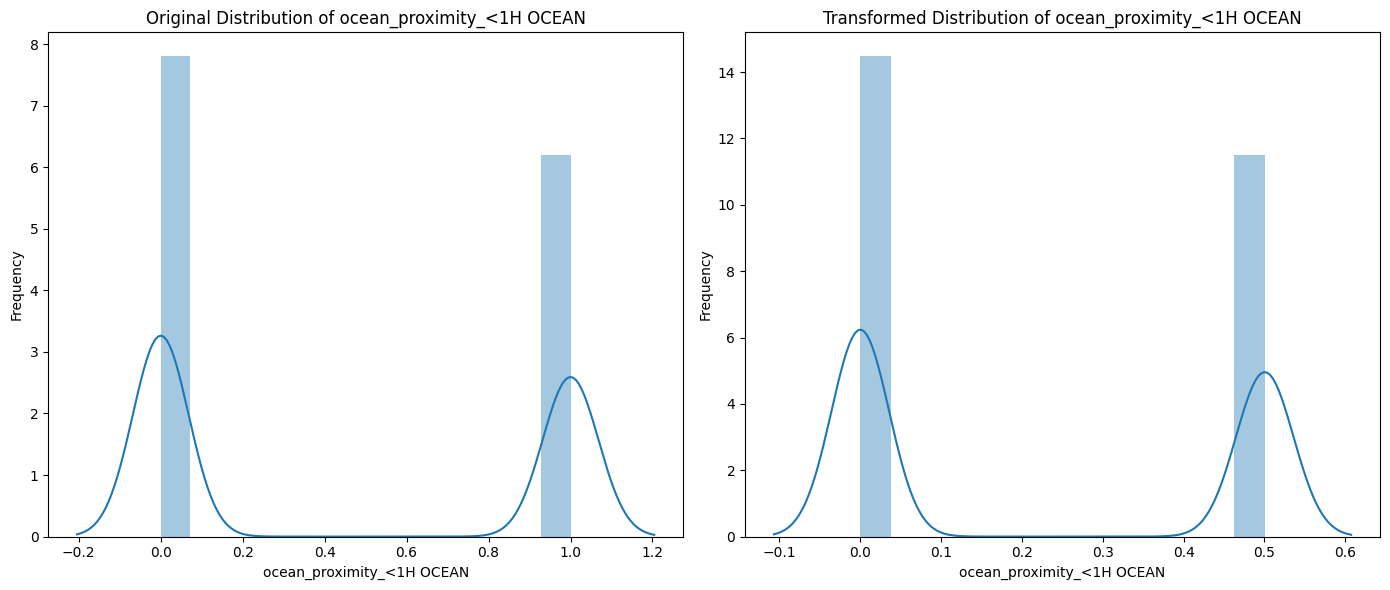

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[feature], kde=True)


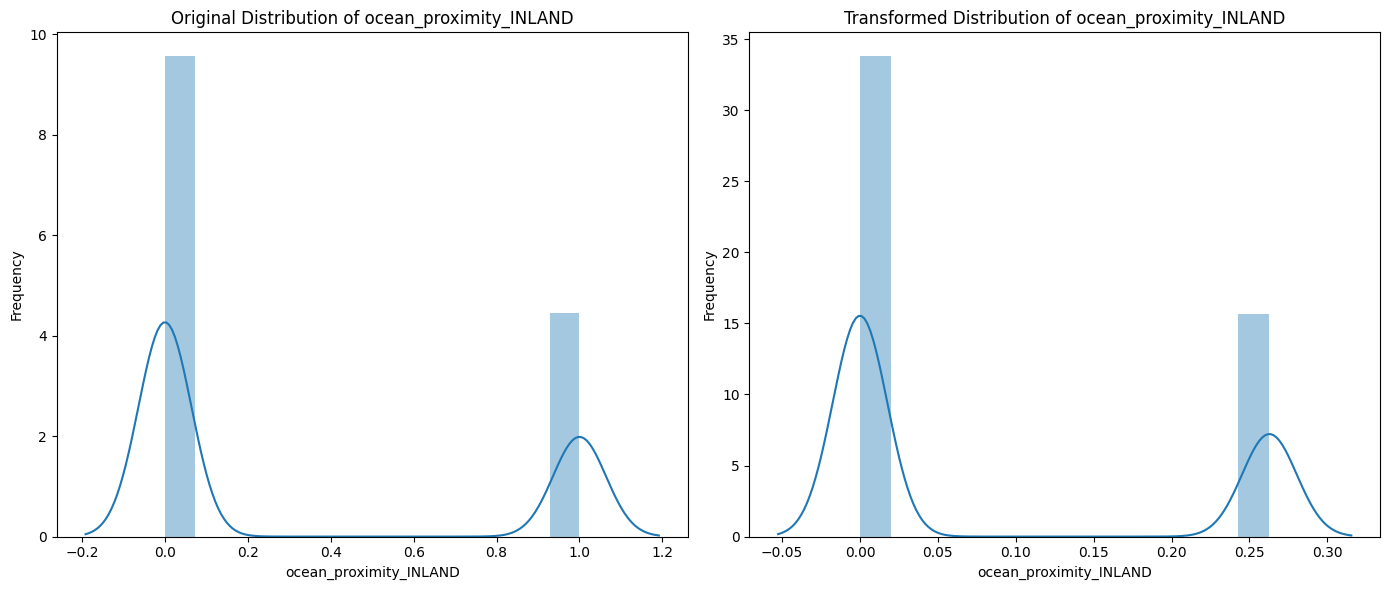

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[feature], kde=True)


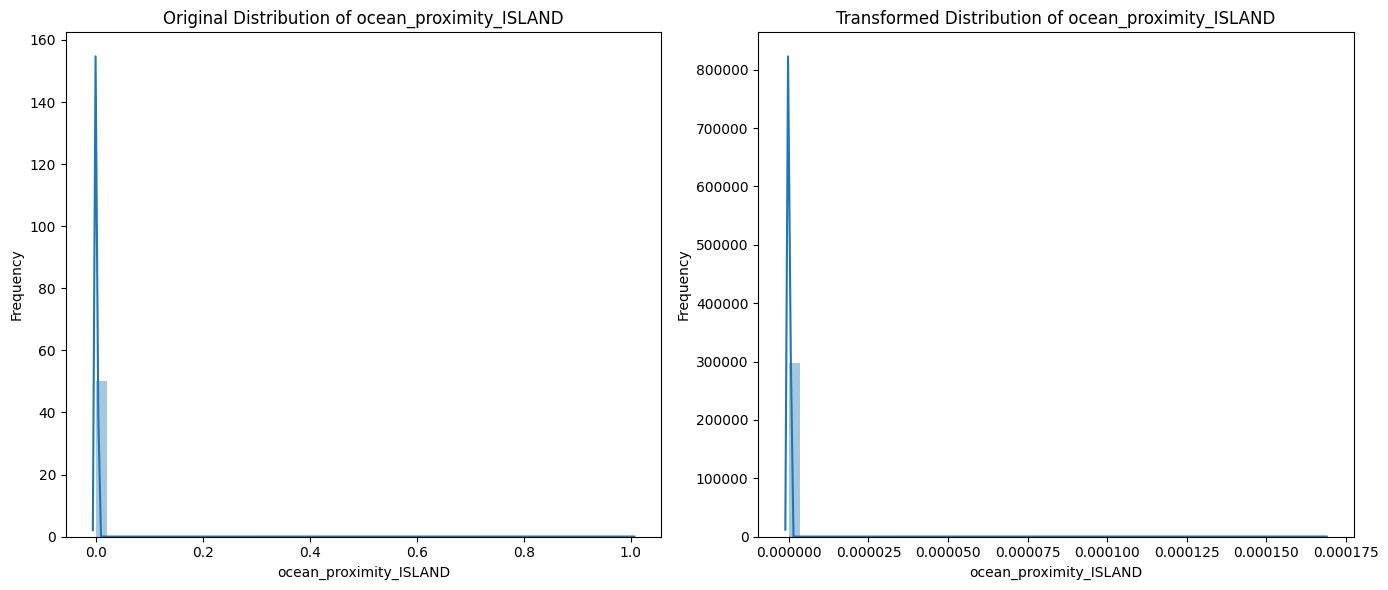

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[feature], kde=True)


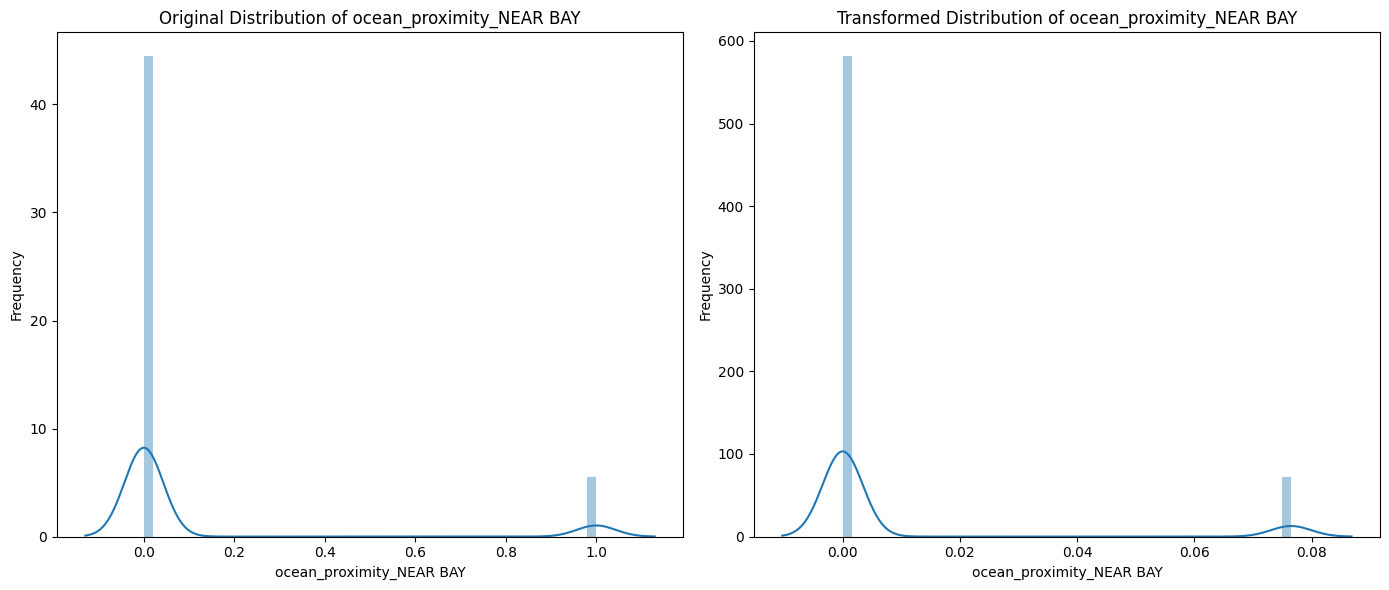

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_12692\2482265444.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[feature], kde=True)


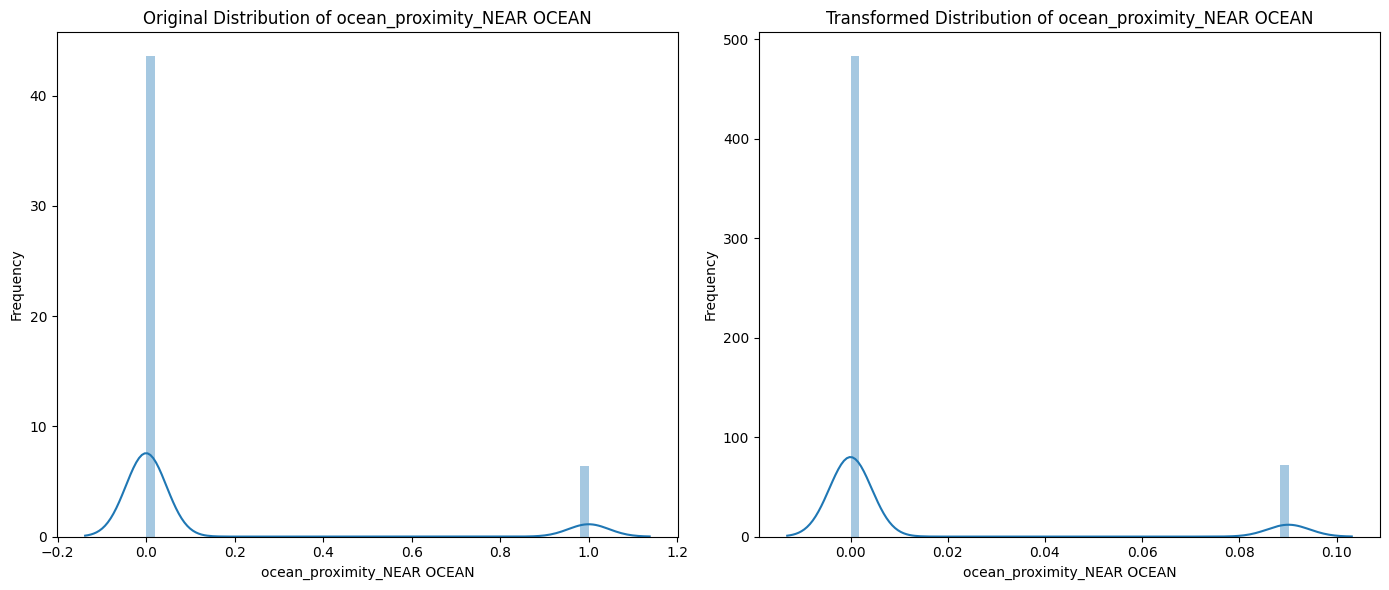

In [35]:
for feature in X_train.columns:
    plt.figure(figsize=(14, 6))
    
    # Original distribution
    plt.subplot(1, 2, 1)
    sns.distplot(df[feature], kde=True)
    plt.title(f'Original Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # Transformed distribution
    plt.subplot(1, 2, 2)
    sns.distplot(new_df[feature], kde=True)
    plt.title(f'Transformed Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [98]:
# Scaling Our Data
scale = StandardScaler()

X_train_trf = scale.fit_transform(X_train_trf)
X_test_trf = scale.transform(X_test_trf)

# Training Our Model

In [100]:
# Without Feature Engineering
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [101]:
mean_squared_error(y_test, y_pred)

4469545697.412685

In [103]:
mean_absolute_error(y_test, y_pred)

49116.4609247626

In [ ]:
# With Feature Engineering
lr = LinearRegression()

lr.fit(X_train_trf, y_train)

y_pred = lr.predict(X_test_trf)


In [107]:
mean_squared_error(y_test, y_pred)

5093010792.475029

In [108]:
mean_absolute_error(y_test, y_pred)

53542.31460484588

# With PipeLine

In [109]:
trf1 = SimpleImputer(strategy='mean')

In [110]:
trf2 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [111]:
trf3 = PowerTransformer(standardize=False)

In [112]:
trf4 = StandardScaler()

In [113]:
trf5 = LinearRegression()

In [114]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('trf5', trf5),
])

In [ ]:
pipe.fit(X_train, y_train)